<a href="https://colab.research.google.com/github/Farwa-01/Solar_Energy_Forecasting/blob/main/Feature_Selection_by_PC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.preprocessing import StandardScaler

# Mount Google Drive to access files
drive.mount('/content/drive')

# Load the dataset from Google Drive
# Replace 'your-folder-path' with the actual folder path in your Google Drive
file_path = '/content/drive/MyDrive/SEG Forecast/60-Site_DKA-M18_A-Phase.csv'
df = pd.read_csv(file_path)

# Select only the necessary columns
df = df[['Active_Power', 'Global_Horizontal_Radiation', 'Weather_Temperature_Celsius',
         'Weather_Relative_Humidity', 'Diffuse_Horizontal_Radiation', 'Wind_Speed',
         'Performance_Ratio']]

# Convert the relevant columns to numeric (if not already)
numeric_columns = ['Active_Power', 'Global_Horizontal_Radiation', 'Weather_Temperature_Celsius',
                   'Weather_Relative_Humidity', 'Diffuse_Horizontal_Radiation', 'Wind_Speed',
                   'Performance_Ratio']

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Handle missing values by filling them with the mean of the column
df.fillna(df.mean(), inplace=True)

# Calculate correlation matrix
correlation_matrix = df.corr()

# Extract correlations with Active Power
active_power_correlation = correlation_matrix['Active_Power']

print("Correlation of all 6 parameters with Active Power:")
print(active_power_correlation)

# Select the 4 highest correlated features (excluding the target variable itself)
top_4_features = active_power_correlation.drop(labels=['Active_Power']).sort_values(ascending=False).index[:4]

print("\nTop 4 features correlated with Active Power:")
print(top_4_features)
print("\nCorrelation values:")
print(active_power_correlation[top_4_features])




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Correlation of all 6 parameters with Active Power:
Active_Power                    1.000000
Global_Horizontal_Radiation     0.699972
Weather_Temperature_Celsius     0.331952
Weather_Relative_Humidity      -0.322321
Diffuse_Horizontal_Radiation    0.391167
Wind_Speed                      0.148322
Performance_Ratio               0.102860
Name: Active_Power, dtype: float64

Top 4 features correlated with Active Power:
Index(['Global_Horizontal_Radiation', 'Diffuse_Horizontal_Radiation',
       'Weather_Temperature_Celsius', 'Wind_Speed'],
      dtype='object')

Correlation values:
Global_Horizontal_Radiation     0.699972
Diffuse_Horizontal_Radiation    0.391167
Weather_Temperature_Celsius     0.331952
Wind_Speed                      0.148322
Name: Active_Power, dtype: float64


In [ ]:
# Import necessary libraries for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select the top 4 features based on correlation values
top_4_features = ['Global_Horizontal_Radiation', 'Diffuse_Horizontal_Radiation',
                  'Weather_Temperature_Celsius', 'Wind_Speed']

# Define features (X) and target (y) for Linear Regression
X = df[top_4_features]
y = df['Active_Power']

# Initialize Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Predict the target variable
y_pred = model.predict(X)

# Calculate and display model performance
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Display the coefficients for each feature
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nCoefficients for each feature:")
print(coefficients)


Mean Squared Error: 1.1303762567286986
R-squared: 0.49103060597946824

Coefficients for each feature:
                        Feature  Coefficient
0   Global_Horizontal_Radiation     0.002933
1  Diffuse_Horizontal_Radiation    -0.000286
2   Weather_Temperature_Celsius    -0.001837
3                    Wind_Speed     0.022169


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Mount Google Drive to access files
drive.mount('/content/drive')

# Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/SEG Forecast/60-Site_DKA-M18_A-Phase.csv'
df = pd.read_csv(file_path)

# Select only the necessary columns
df = df[['Active_Power', 'Global_Horizontal_Radiation', 'Weather_Temperature_Celsius',
         'Weather_Relative_Humidity', 'Diffuse_Horizontal_Radiation', 'Wind_Speed',
         'Performance_Ratio']]

# Convert the relevant columns to numeric (if not already)
numeric_columns = ['Active_Power', 'Global_Horizontal_Radiation', 'Weather_Temperature_Celsius',
                   'Weather_Relative_Humidity', 'Diffuse_Horizontal_Radiation', 'Wind_Speed',
                   'Performance_Ratio']

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Handle missing values by filling them with the mean of the column
df.fillna(df.mean(), inplace=True)

# Define features (X) and target (y) for Linear Regression
X = df[['Global_Horizontal_Radiation', 'Weather_Temperature_Celsius',
        'Diffuse_Horizontal_Radiation', 'Wind_Speed']]
y = df['Active_Power']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial Features Transformation
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize Linear Regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

# Calculate and display model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Polynomial Linear Regression Model (Degree 2)")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Regularization (Ridge Regression)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_poly, y_train)
y_pred_ridge = ridge_model.predict(X_test_poly)

# Calculate and display Ridge Regression model performance
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"\nRidge Regression Model")
print(f"Mean Squared Error: {mse_ridge}")
print(f"R-squared: {r2_ridge}")

# Regularization (Lasso Regression)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_poly, y_train)
y_pred_lasso = lasso_model.predict(X_test_poly)

# Calculate and display Lasso Regression model performance
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"\nLasso Regression Model")
print(f"Mean Squared Error: {mse_lasso}")
print(f"R-squared: {r2_lasso}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Polynomial Linear Regression Model (Degree 2)
Mean Squared Error: 1.095368277443133
R-squared: 0.5062357430003382

Ridge Regression Model
Mean Squared Error: 1.0953682760926542
R-squared: 0.5062357436090998

Lasso Regression Model
Mean Squared Error: 1.0969131857612286
R-squared: 0.5055393374867536


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Calculate and display Lasso Regression model performance

rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)



print(f"Root Mean Squared Error (RMSE): {rmse_lasso}")
print(f"Mean Absolute Error (MAE): {mae_lasso}")

Root Mean Squared Error (RMSE): 1.0473362333850713
Mean Absolute Error (MAE): 0.6217259788830042


<ipython-input-13-53134ff525c6>:26: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  bar_plot = sns.barplot(x='Metric', y='Score', hue='Technique', data=df, palette=palette)


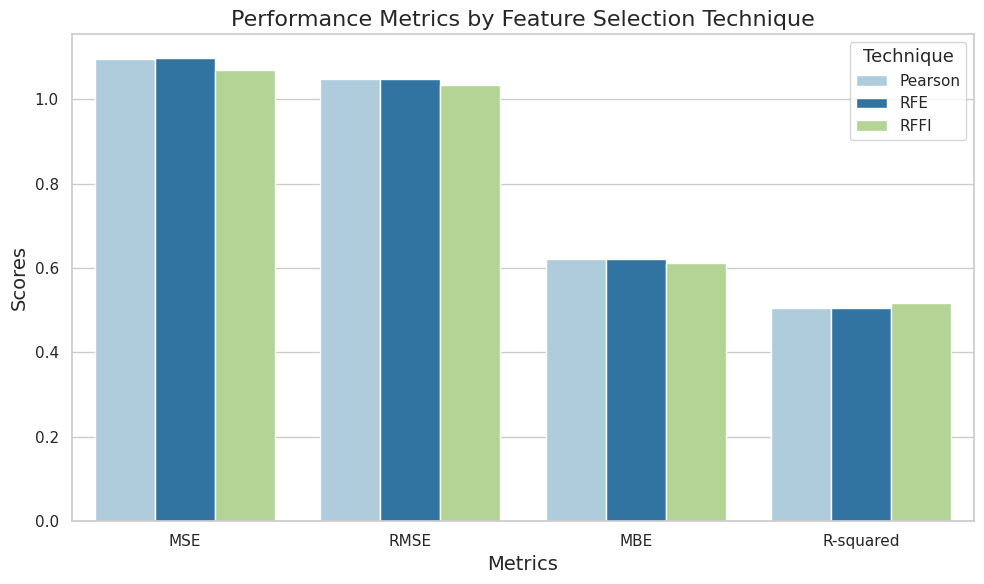

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Data from the table
metrics = ['MSE', 'RMSE', 'MBE', 'R-squared']
pearson = [1.096, 1.0473, 0.6217, 0.5055]
rfe = [1.0987, 1.0481, 0.6209, 0.5047]
rffi = [1.0694, 1.0341, 0.6128, 0.5179]

# Create a DataFrame for easier plotting with seaborn
data = {
    'Metric': metrics * 3,
    'Score': pearson + rfe + rffi,
    'Technique': ['Pearson'] * 4 + ['RFE'] * 4 + ['RFFI'] * 4
}
df = pd.DataFrame(data)

# Set the style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("Paired")

# Create the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Metric', y='Score', hue='Technique', data=df, palette=palette)

# Add title and labels
plt.title('Performance Metrics by Feature Selection Technique', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Scores', fontsize=14)

# Customize the legend
plt.legend(title='Technique', title_fontsize='13', fontsize='11')

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-2-acffc9c50307>:26: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  bar_plot = sns.barplot(x='Metric', y='Score', hue='Technique', data=df, palette=palette)


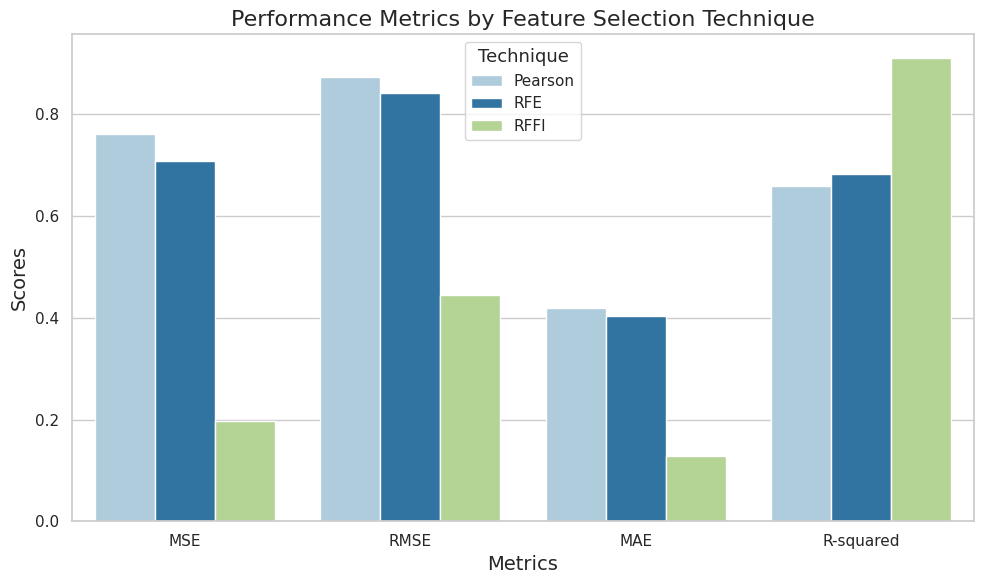

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Data from the table
metrics = ['MSE', 'RMSE', 'MAE', 'R-squared']
pearson = [0.7613, 0.8725, 0.4200, 0.6598]
rfe = [0.7089, 0.8419, 0.4038, 0.6832]
rffi = [0.1978, 0.4447, 0.1286, 0.9116]

# Create a DataFrame for easier plotting with seaborn
data = {
    'Metric': metrics * 3,
    'Score': pearson + rfe + rffi,
    'Technique': ['Pearson'] * 4 + ['RFE'] * 4 + ['RFFI'] * 4
}
df = pd.DataFrame(data)

# Set the style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("Paired")

# Create the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Metric', y='Score', hue='Technique', data=df, palette=palette)

# Add title and labels
plt.title('Performance Metrics by Feature Selection Technique', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Scores', fontsize=14)

# Customize the legend
plt.legend(title='Technique', title_fontsize='13', fontsize='11')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/SEG Forecast/60-Site_DKA-M18_A-Phase.csv')  # Replace with your actual file path

# Impute missing values for both features and the target variable
imputer = SimpleImputer(strategy='median')

# Selecting features and target before imputation
features = data[['Global_Horizontal_Radiation', 'Weather_Temperature_Celsius',
        'Diffuse_Horizontal_Radiation', 'Wind_Speed']]
target = data['Active_Power']

# Applying imputation
features_imputed = imputer.fit_transform(features)
target_imputed = imputer.fit_transform(target.values.reshape(-1,1)).ravel()

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target_imputed, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model building
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)  # Adjust hidden_layer_sizes and other parameters as needed
mlp_model.fit(X_train_scaled, y_train)

# Predicting the test results
y_pred = mlp_model.predict(X_test_scaled)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
epsilon = 1e-8  # Small number to prevent division by zero
mape = np.mean(np.abs((y_test - y_pred) / (y_test + epsilon))) * 100  # Modified MAPE calculation

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-Squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')


Mean Squared Error: 0.8512744541539795
Root Mean Squared Error: 0.9226453566533457
R-Squared: 0.6196448902115015
Mean Absolute Error: 0.5061154432096417
Mean Absolute Percentage Error: 980842400.10%
